In [2]:
# Boilerplate to import

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

from IPython.display import display, Markdown, Latex

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from ipywidgets import *

%matplotlib notebook

cm = 'magma' # Standard colormap
divcm = 'RdYlBu'   # Diverging colormap

# A function for computing the magnitude squared of complex numbers
mag_squared = lambda a: (np.conj(a)*a).real

# <center> Identical Particles 3
# Visualizing States of Identical Particles

This material is also covered in Mcintyre 13.2

Lets use the infinite square well as a sample potential to put our particles in. For a single particle, solutions to the infinite square well are

## <center> $\phi_n(x)=\sqrt{\frac{2}{L}}sin(\frac{n \pi x}{L})$
    
    

<IPython.core.display.Javascript object>


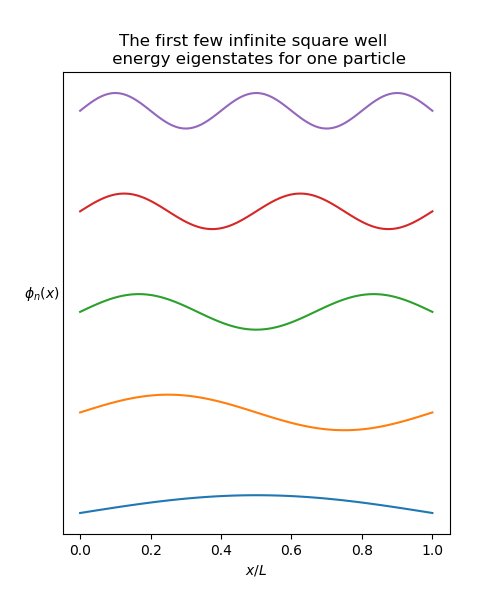

In [19]:
# we will take L=1 for convenience
def phi(x,n): 
    return (1/np.sqrt(2))*np.sin(n*np.pi*x)
    
# Plot the first few infinite square well wavefunctions

f, ax = plt.subplots(figsize=(5,6))

x = np.linspace(0,1,100)
[ax.plot(x,phi(x,n)+4*n, label = n ) for n in range(1,6)]
ax.set_title("The first few infinite square well \n energy eigenstates for one particle")
ax.set_ylabel("$\phi_n(x)$",rotation=0,labelpad=15)
ax.set_xlabel("$x/L$")
plt.yticks([]);

## Now let's put two particles in the infinite-square well. The particles do not interact except as a consequence of the Symmetrization requirement.

### Let one of the particles have energy $n_1$ and the other particle have energy $n_2$

### There are three possible situations

### 1. The particles are distinguishable. 
If particles are distinguishable, energy eigenfunctions are just products of the single-particle energy eigenfunctions. Since the two particles don't "see each other," it is effectively as if they are in totally separate square wells.
### <center> $\phi_{n_1,n_2}(x_1,x_2) = \frac{2}{L}sin(\frac{n_1 \pi x_1}{L})sin(\frac{n_2 \pi x_2}{L}) =\frac{1}{\sqrt{2}}\phi_{n_1}(x_1)\phi_{n_2}(x_2)$

### 2. The particles are indistinguishable and the spatial state is symmetric. 
Energy eigenfunctions are just products of the single-particle energy eigenfunctions
### <center> $\phi^S_{n_1,n_2}(x_1,x_2) = \frac{1}{\sqrt{2}}[\phi_{n_1}(x_1)\phi_{n_2}(x_2)+\phi_{n_1}(x_2)\phi_{n_2}(x_1)]$

### 3. The particles are indistinguishable and the spatial state is antisymmetric. 
Energy eigenfunctions are just products of the single-particle energy eigenfunctions
### <center> $\phi^A_{n_1,n_2}(x_1,x_2) = \frac{1}{\sqrt{2}}[\phi_{n_1}(x_1)\phi_{n_2}(x_2)-\phi_{n_1}(x_2)\phi_{n_2}(x_1)]$

### When the particles are indisinguishable, the symmetry of the spatial state depends on
1. Whether the two particles are fermions or bosons
2. The symmetry of the spin state

Therefore, just because you have two bosons does not mean their spatial state has to be symmetric. Similarly, two fermions do not have to have a symmetric spatial state. It is only the total quantum state that must have the appropriate symmetry.

# The two-particle ground state

In the two particle ground state, $n_1 = n_2 = 1$. There is only one spatial state and it is symmetric. It is the lowest energy state both for distinguishable and identical particles

### <center> $\phi_{11} = \phi_1(x_1)\phi_1(x_2) = \frac{2}{L}sin(\frac{\pi x_1}{L})sin(\frac{\pi x_2}{L})$

<IPython.core.display.Javascript object>


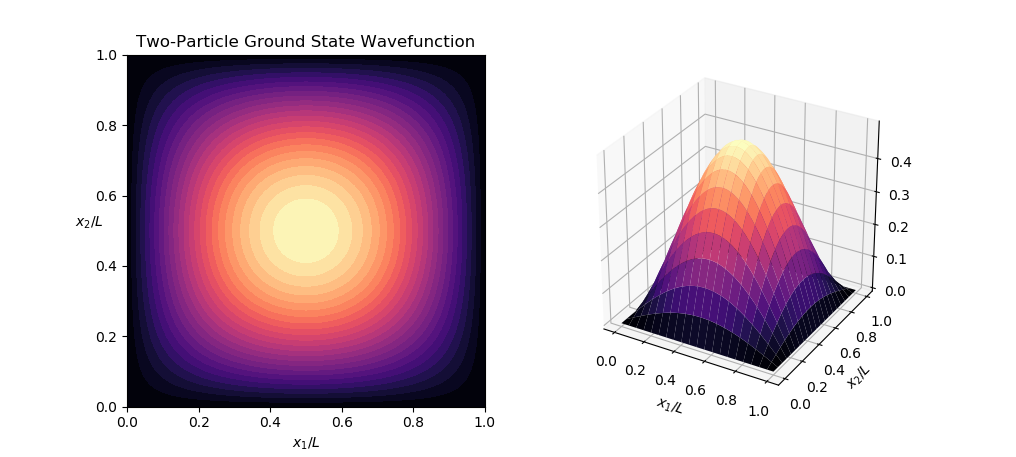

Text(0.5, 0, '$x_2/L$')

In [4]:
# Define a function for making $\phi_{n_1}(x_1)\phi_{n_2}(x_2)$
def phi2d(x1,x2,n1,n2):
    return phi(x1,n1)*phi(x2,n2)

# Create a grid for 2D plotting
x = np.linspace(0,1,100)
xx1, xx2 = np.meshgrid(x,x)

# Plot the ground state as a density plot
f2 = plt.figure(figsize=(8,4))

# Add a "3D" Plot
ax2 = f2.add_subplot(1,2,1)
ax3 = f2.add_subplot(1,2,2,projection = '3d')

gnd = phi2d(xx1,xx2,1,1)
#ax2.imshow(gnd,extent = [0,1,0,1])
ax2.contourf(xx1,xx2,gnd,levels=25,cmap = cm)
ax2.set_ylabel("$x_2/L$",rotation=0)
ax2.set_xlabel("$x_1/L$")
ax2.set_title("Two-Particle Ground State Wavefunction");

ax3.plot_surface(xx1,xx2,gnd,rstride=5,cstride=5,cmap=cm)
ax3.set_xlabel('$x_1/L$')
ax3.set_ylabel('$x_2/L$')

# Two-Particle Excited States

<IPython.core.display.Javascript object>


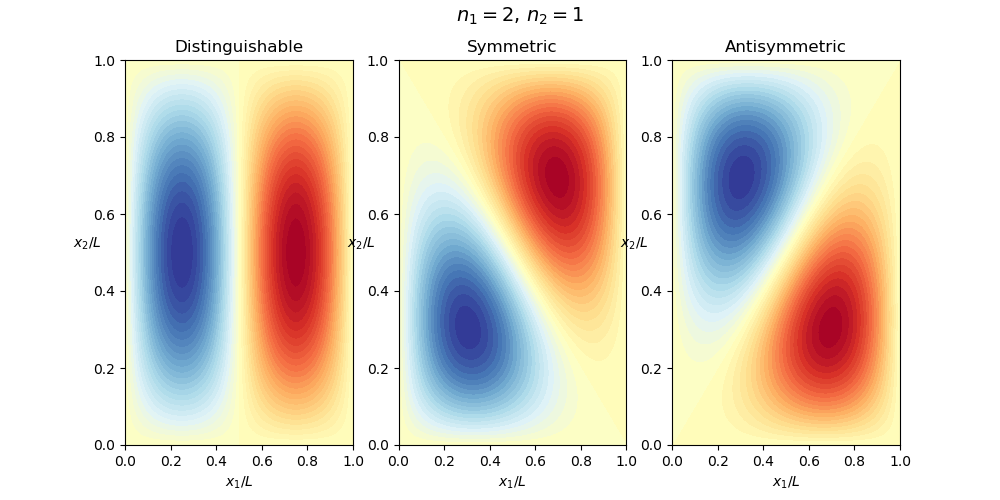

interactive(children=(IntSlider(value=1, description='n1', max=10, min=1), IntSlider(value=1, description='n2'…

<function __main__.update_plot(n1, n2, plotyx)>

In [18]:
f3,ax3s = plt.subplots(1,3,figsize=(10,5))

for ax in ax3s:
    ax.set_xlabel("$x_1/L$")
    ax.set_ylabel("$x_2/L$")

def update_plot(n1,n2,plotyx):
    for ax in ax3s:
        ax.clear()
        ax.set_xlabel("$x_1/L$")
        ax.set_ylabel("$x_2/L$",rotation=0)
    
    ax3s[0].contourf(xx1,xx2,phi2d(xx1,xx2,n1,n2),levels=50,cmap=divcm)
    ax3s[0].set_title("Distinguishable")
    
    ax3s[1].contourf(xx1,xx2,(1/np.sqrt(2))*(phi2d(xx1,xx2,n1,n2)+phi2d(xx1,xx2,n2,n1)),levels=50,cmap=divcm)
    ax3s[1].set_title("Symmetric")
    
    ax3s[2].contourf(xx1,xx2,(1/np.sqrt(2))*(phi2d(xx1,xx2,n1,n2)-phi2d(xx1,xx2,n2,n1)),levels=50,cmap=divcm)
    ax3s[2].set_title("Antisymmetric")
    
    if(plotyx):
        for ax in ax3s:
            ax.plot([0,1],[0,1],color='black',linewidth=3)
    
    ax3s[1].text(0.25,1.1,"$n_1=${}, $n_2=${}".format(n1,n2),fontsize=14)

interact(update_plot,
         n1=IntSlider(min=1,max=10,step=1,value=1), 
         n2=IntSlider(min=1,max=10,step=1,value=1), 
         plotyx=Checkbox(value=False,description="Plot x1 = x2 line?"))

## Exchange interaction

Even though there is no potential energy interaction between the two particles, particles in a symmetric spatial state are found closer together (their joint distribution peaks along $x1 = x2$).

Particles in an antisymmetric spatial state are found farther apart --- and never in the same location (along $x_1 = x_2$)

One way to investigate the exchange interaction is to find the expectation value of the square of the separation distance between the two particles.

### $\langle (\hat{x}_1-\hat{x}_2)^2 \rangle =  \langle \hat{x}_1^2 \rangle + \langle \hat{x}_2^2 \rangle - 2\langle \hat{x}_1 \hat{x}_2\rangle $

### Question Why should we square it?

In [17]:
def exp_diff(xx1,xx2,psi):
    p = psi*np.conj(psi) # take the magnitude-square of psi to find the probability distribution
    p = p/np.sum(p) # make sure p is normalized to 1, since it is a discrete approximation our standard normalization doesn't work
    
    exp1 = np.sum(xx1*xx1*p) # expectation value of x1^2
    exp2 = np.sum(xx2*xx2*p) # expectation value of x2^2
    exp12 = np.sum(xx1*xx2*p) # expectation value x1*x2
    
    return exp1 + exp2 - 2*exp12

In [16]:
n1=1
n2=2

phi_single = phi2d(xx1,xx2,n1,n2)
phi_sym = phi2d(xx1,xx2,n1,n2) + phi2d(xx2,xx1,n1,n2)
phi_anti = phi2d(xx1,xx2,n1,n2) - phi2d(xx2,xx1,n1,n2)

exch = [np.sqrt(exp_diff(xx1,xx2,p)) for p in [phi_single, phi_sym, phi_anti]]

print("n1 = {}, n2 = {}\n".format(n1,n2))
print("Distinguishable\t {:.2f}L\nSymmetric\t {:.2f}L\nAntisymmetric\t {:.2f}L".format(exch[0],exch[1],exch[2]))
    


n1 = 1, n2 = 2

Distinguishable	 0.32L
Symmetric	 0.20L
Antisymmetric	 0.41L


## This effect is sometimes called an Exchange force because it appears as an effective attraction or repulsion between two identical particles